### Mount my drive and import libraries

In [ ]:
from google.colab import drive 
drive.mount('/content/drive',force_remount=True) 

Mounted at /content/drive


In [ ]:
import sys
sys.path.append("/content/drive/MyDrive") 

In [ ]:
import MPS_utils # import the main .py script

In [ ]:
import matplotlib.pyplot as plt  # helper libraries
import pandas as pd
import tensorflow as tf


%matplotlib inline
print(tf.__version__) 

2.4.1


In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0' :
  raise SystemError('GPU device not found') 
print('Found GPU at: {}'.format(device_name))

### Load Fashion MNIST dataset

In [ ]:
fashion_dataset = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_dataset.load_data()

4423680/4422102 [==============================] - 0s 0us/step


(28, 28)


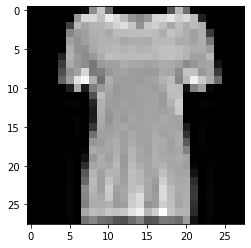

In [ ]:
image_index = 10
print(train_images[image_index].shape) 
plt.imshow(train_images[image_index], cmap='gray')

### Dataset preparation

In [ ]:
training, one_hot, test, one_hot_test = MPS_utils.dataset_preparation(train_images,train_labels,test_images,test_labels)


In [ ]:
train_images = train_images
train_labels = train_labels
test_images = test_images
test_labels = test_labels 

### GO with the training

In [ ]:
fit = MPS_utils.MPS_training(train_dim = training.shape[1], label_one_dim=10, bond_dim=10,
                 training_set=training, training_label=one_hot, test_set=test, test_label=one_hot_test,
                 batch_size=10, epochs=100, optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))

Epoch 1/100
6000/6000 [==============================] - 32s 5ms/step - loss: 0.7187 - accuracy: 0.7320 - val_loss: 0.4610 - val_accuracy: 0.8358
Epoch 2/100
6000/6000 [==============================] - 27s 5ms/step - loss: 0.4198 - accuracy: 0.8467 - val_loss: 0.4104 - val_accuracy: 0.8494
Epoch 3/100
6000/6000 [==============================] - 28s 5ms/step - loss: 0.3828 - accuracy: 0.8621 - val_loss: 0.4469 - val_accuracy: 0.8398
Epoch 4/100
6000/6000 [==============================] - 28s 5ms/step - loss: 0.3618 - accuracy: 0.8689 - val_loss: 0.3779 - val_accuracy: 0.8658
Epoch 5/100
6000/6000 [==============================] - 27s 5ms/step - loss: 0.3344 - accuracy: 0.8778 - val_loss: 0.4113 - val_accuracy: 0.8529
Epoch 6/100
6000/6000 [==============================] - 28s 5ms/step - loss: 0.3270 - accuracy: 0.8812 - val_loss: 0.3712 - val_accuracy: 0.8699
Epoch 7/100
6000/6000 [==============================] - 27s 5ms/step - loss: 0.3149 - accuracy: 0.8850 - val_loss: 0.3966 -

### Visualize and save history

In [ ]:
bb = pd.DataFrame(fit.history) 
bb.to_csv('FashionMNIST_history_final.csv')
! cp FashionMNIST_history_final.csv "drive/MyDrive"

In [ ]:
bb

,loss,accuracy,val_loss,val_accuracy
0,0.554792,0.797467,0.460960,0.8358
1,0.417114,0.847667,0.410371,0.8494
2,0.379165,0.861483,0.446948,0.8398
3,0.356161,0.869967,0.377925,0.8658
4,0.336747,0.877100,0.411315,0.8529
...,...,...,...,...
95,0.137566,0.951267,0.624011,0.8706
96,0.142320,0.949883,0.540351,0.8668
97,0.135652,0.951683,0.574006,0.8772
98,0.137203,0.952467,0.606122,0.8712


In [ ]:
bb['val_accuracy'].max() 

0.8841999769210815

In [ ]:
bb['accuracy'].max()

0.9524666666984558

## Plots

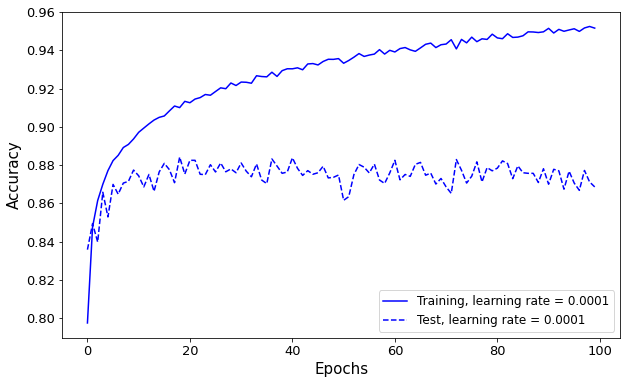

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(bb['accuracy'], color='blue',label='Training, learning rate = 0.0001')
plt.plot(bb['val_accuracy'],color='blue',linestyle='dashed',label='Test, learning rate = 0.0001') 
plt.legend(loc=4,prop={'size':12}) 
plt.tick_params(labelsize = 13)
plt.xlabel('Epochs',size=15)
plt.ylabel('Accuracy',size=15)

plt.show()

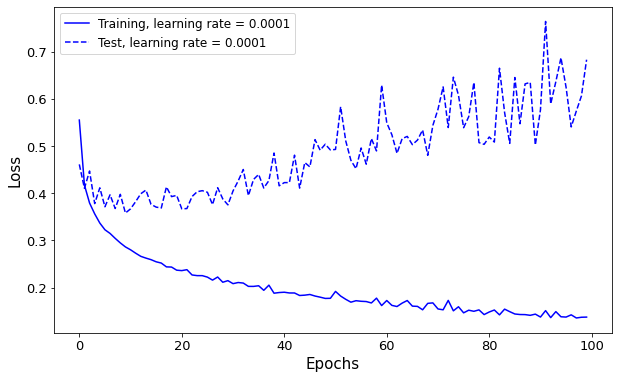

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(bb['loss'], color='blue',label='Training, learning rate = 0.0001')
plt.plot(bb['val_loss'],color='blue',linestyle='dashed',label='Test, learning rate = 0.0001') 
plt.legend(loc=0,prop={'size':12}) 
plt.tick_params(labelsize = 13)
plt.xlabel('Epochs',size=15)
plt.ylabel('Loss',size=15)

plt.show()